<a href="https://colab.research.google.com/github/1337Rinz/tool/blob/main/managing_the_risk_of_ruin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The simulate_trade function simulates the outcome of a single trade based on the win probability. If a random number is less than the win probability, the trade is a win, otherwise, it's a loss. The function returns the gain or loss accordingly.

In [2]:
def simulate_trade(win_prob, avg_win, avg_loss):
    """
    Simulate a single trade with given win probability and average win/loss amounts.
    """
    if np.random.rand() < win_prob:
        return avg_win
    else:
        return -avg_loss

set up a function that simulates a large number of trades.

In [3]:
def simulate_trading_strategy(initial_capital, trades, win_prob, avg_win, avg_loss):
    """
    Simulate the entire trading strategy over a given number of trades.
    """
    capital = initial_capital
    capital_history = [capital]

    for _ in range(trades):
        capital += simulate_trade(win_prob, avg_win, avg_loss)
        capital_history.append(capital)

    return capital_history

In [4]:
def calculate_risk_of_ruin(initial_capital, trades, win_prob, avg_win, avg_loss, simulations=100):
    """
    Calculate the risk of ruin over a number of trading simulations.
    """
    ruin_count = 0

    for _ in range(simulations):
        capital_history = simulate_trading_strategy(initial_capital, trades, win_prob, avg_win, avg_loss)
        if min(capital_history) <= 0:
            ruin_count += 1

    return ruin_count / simulations

Simulate the strategy to compute the risk of ruin
The initial parameters set the stage for our simulation. We define initial capital, win probability, and average win/loss amounts.

In [5]:
initial_capital = 10000
average_win = 110
average_loss = 100
trades = 1000

calculate the risk of ruin for a trading strategy across a range of win probabilities. It iterates through win probabilities from 30% to 59%, computes the risk of ruin for each probability  and stores the results.

In [6]:
risk_of_ruins = []
steps = range(30, 60)
for step in steps:
    win_probability = step / 100
    risk_of_ruin = calculate_risk_of_ruin(initial_capital, trades, win_probability, average_win, average_loss)
    risk_of_ruins.append(risk_of_ruin)

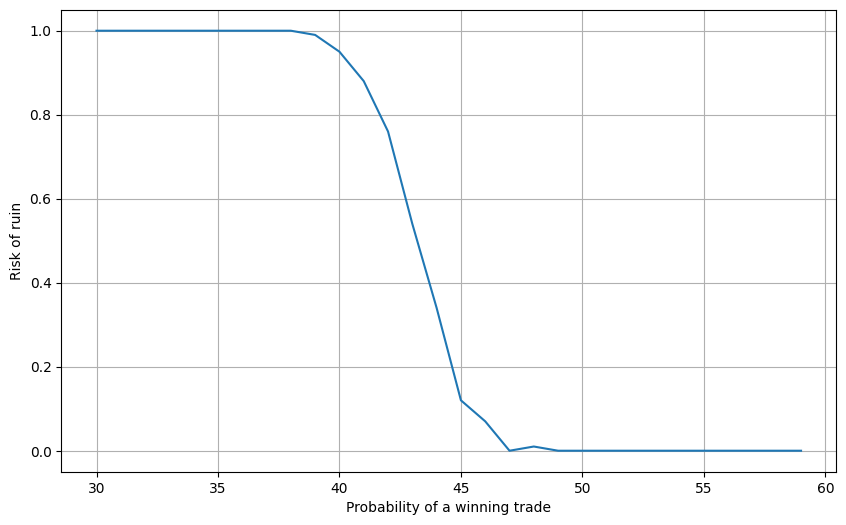

In [7]:
# Plot the capital history
plt.figure(figsize=(10, 6))
plt.plot(steps, risk_of_ruins, label='Risk of ruin')
plt.xlabel('Probability of a winning trade')
plt.ylabel('Risk of ruin')
plt.grid(True)
plt.show()